In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 1.Find out how many males and females participated in the test.

In [8]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

### 2.What do you think about the students' parental level of education

In [9]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [10]:
ple=df.groupby('parental level of education')[['math score','reading score','writing score']].mean()
ple=ple.sort_values(['math score','reading score','writing score'],ascending=False)
ple

,math score,reading score,writing score
parental level of education,,,
master's degree,70.254237,75.949153,75.677966
bachelor's degree,69.288136,73.000000,73.381356
associate's degree,67.977477,71.018018,70.031532
some college,67.128319,69.566372,69.035398
some high school,63.134078,66.759777,64.888268
high school,61.821429,64.602041,62.403061


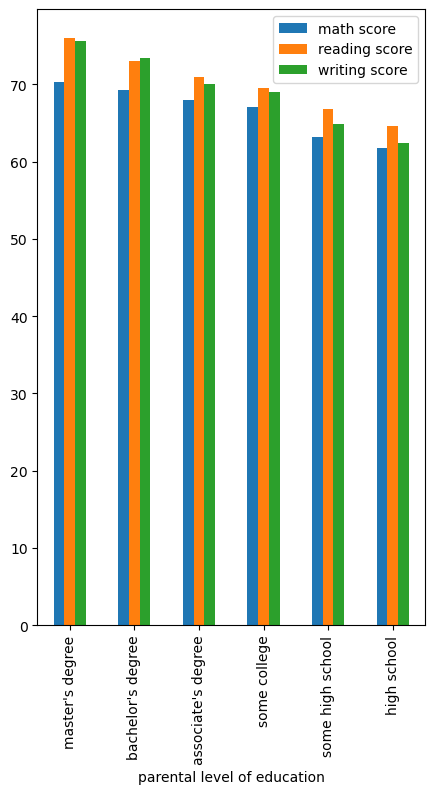

In [11]:
ple.plot(kind='bar',figsize=(5,8));

Master's degree and bachelor's degree students take a lower parental level of education compared to some college and associate's degree students, but their avg.scores are higher than those who take a parental level of education. 

### 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [12]:
df.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [13]:
df.groupby('test preparation course')[['math score','reading score','writing score']].std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


### 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course


In [14]:
df.groupby('gender')[['math score','reading score','writing score']].std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [15]:
df.groupby('test preparation course')[['math score','reading score','writing score']].std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


### 5. The management needs your help to give bonus points to the top 25% ofstudents based on their math score, so how will you help the managementto achieve this.

In [16]:
student=df.sort_values(by='math score',ascending=False)
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [17]:
top_student=student['math score'].quantile(0.75)

In [18]:
top_student

77.0

In [19]:
top25_students=student[student['math score']>top_student]

In [20]:
top25_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
862,male,group D,high school,free/reduced,completed,78,77,80
863,male,group D,some high school,standard,completed,78,81,86
864,male,group E,some high school,free/reduced,completed,78,83,80
865,male,group E,associate's degree,free/reduced,completed,78,74,72


In [21]:
top25_students['math score'].value_counts().sort_index()

78     15
79     22
80     17
81     22
82     18
83      8
84     11
85     14
86      8
87     16
88     15
89      6
90      9
91      9
92      6
93      4
94      7
95      2
96      3
97      6
98      3
99      3
100     7
Name: math score, dtype: int64

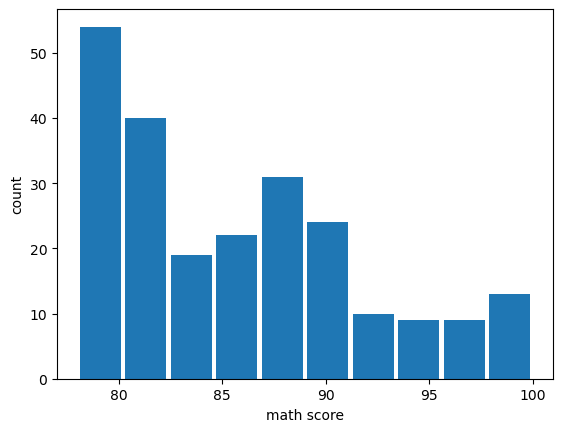

In [22]:
plt.hist(top25_students['math score'],rwidth=0.9);
plt.xlabel('math score');
plt.ylabel('count');
